In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
df = pd.read_csv('C:/Users/EWong/Documents/A Kim/SMU/data.csv', index_col='shot_id')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 1 to 30697
Data columns (total 24 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [6]:
# Display the first and last five rows
print(df.head(5))
print(df.tail(5))

               action_type combined_shot_type  game_event_id   game_id  \
shot_id                                                                  
1                Jump Shot          Jump Shot             10  20000012   
2                Jump Shot          Jump Shot             12  20000012   
3                Jump Shot          Jump Shot             35  20000012   
4                Jump Shot          Jump Shot             43  20000012   
5        Driving Dunk Shot               Dunk            155  20000012   

             lat  loc_x  loc_y       lon  minutes_remaining  period    ...     \
shot_id                                                                ...      
1        33.9723    167     72 -118.1028                 10       1    ...      
2        34.0443   -157      0 -118.4268                 10       1    ...      
3        33.9093   -101    135 -118.3708                  7       1    ...      
4        33.8693    138    175 -118.1318                  6       1    ...  

In [7]:
# Count of Missing Data
df.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
dtype: int64

In [8]:
# Print columns with null value
df.columns[df.isnull().any()]

Index(['shot_made_flag'], dtype='object')

In [9]:
# Create new dataframe null shot_made_flag removed
df2 = df[df['shot_made_flag'].notnull()].reset_index()
df2.shape

(25697, 25)

In [10]:
# Create summary statistics
summary = df2.describe()

# Print the summary
print(summary)


            shot_id  game_event_id       game_id           lat         loc_x  \
count  25697.000000   25697.000000  2.569700e+04  25697.000000  25697.000000   
mean   15328.166946     249.348679  2.474109e+07     33.953043      7.148422   
std     8860.462397     149.778520  7.738108e+06      0.088152    110.073147   
min        2.000000       2.000000  2.000001e+07     33.253300   -250.000000   
25%     7646.000000     111.000000  2.050006e+07     33.884300    -67.000000   
50%    15336.000000     253.000000  2.090034e+07     33.970300      0.000000   
75%    22976.000000     367.000000  2.960027e+07     34.040300     94.000000   
max    30697.000000     653.000000  4.990009e+07     34.088300    248.000000   

              loc_y           lon  minutes_remaining        period  \
count  25697.000000  25697.000000       25697.000000  25697.000000   
mean      91.257345   -118.262652           4.886796      2.520800   
std       88.152106      0.110073           3.452475      1.151626   

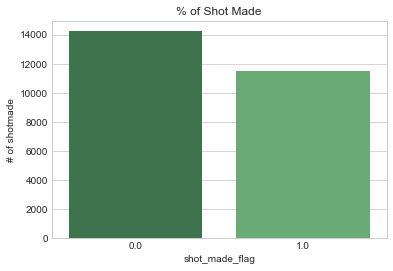

In [138]:
# number of shots - Shot_made 45% of time
sns.countplot(x='shot_made_flag', data=df2, palette="Greens_d");
plt.ylabel('# of shotmade')
plt.title('% of Shot Made')
plt.show()


In [135]:
# % of shot
df2['shot_made_flag'].value_counts() / df2['shot_made_flag'].shape

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

In [12]:
# descriptive statistics on categorical columns
#Jump Shot is the top use technique
df2.describe(include=['object'])

action_type combined_shot_type   season       shot_type shot_zone_area  \
count        25697              25697    25697           25697          25697   
unique          55                  6       20               2              6   
top      Jump Shot          Jump Shot  2005-06  2PT Field Goal      Center(C)   
freq         15836              19710     1924           20285          11289   

       shot_zone_basic  shot_zone_range           team_name   game_date  \
count            25697            25697               25697       25697   
unique               7                5                   1        1558   
top          Mid-Range  Less Than 8 ft.  Los Angeles Lakers  2016-04-13   
freq             10532             7857               25697          43   

          matchup opponent  
count       25697    25697  
unique         74       33  
top     LAL @ SAS      SAS  
freq          853     1638

In [137]:
# summary about the distribution of shot_made within the group
df_bygroup = df2.groupby( ['combined_shot_type'])
print(df_bygroup['shot_made_flag'].describe(include=['object']))
print(df_bygroup['shot_made_flag'].agg([np.sum, np.mean, np.std, len])) #len = count
print(df_bygroup['shot_made_flag'].value_counts() / df2['shot_made_flag'].shape)

                      count      mean       std  min  25%  50%  75%  max
combined_shot_type                                                      
Bank Shot             120.0  0.791667  0.407819  0.0  1.0  1.0  1.0  1.0
Dunk                 1056.0  0.928030  0.258560  0.0  1.0  1.0  1.0  1.0
Hook Shot             127.0  0.535433  0.500718  0.0  0.0  1.0  1.0  1.0
Jump Shot           19710.0  0.391071  0.488003  0.0  0.0  0.0  1.0  1.0
Layup                4532.0  0.565093  0.495800  0.0  0.0  1.0  1.0  1.0
Tip Shot              152.0  0.348684  0.478129  0.0  0.0  0.0  1.0  1.0
                       sum      mean       std      len
combined_shot_type                                     
Bank Shot             95.0  0.791667  0.407819    120.0
Dunk                 980.0  0.928030  0.258560   1056.0
Hook Shot             68.0  0.535433  0.500718    127.0
Jump Shot           7708.0  0.391071  0.488003  19710.0
Layup               2561.0  0.565093  0.495800   4532.0
Tip Shot              53

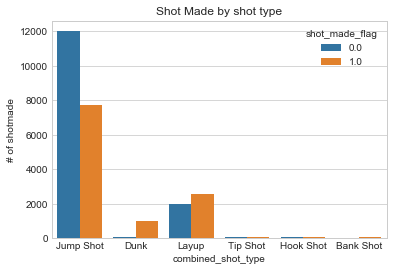

In [102]:
# Bar chart on shot_made by combined_shot_type
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=df2)
plt.ylabel('# of shotmade')
plt.title('Shot Made by shot type')
plt.show()

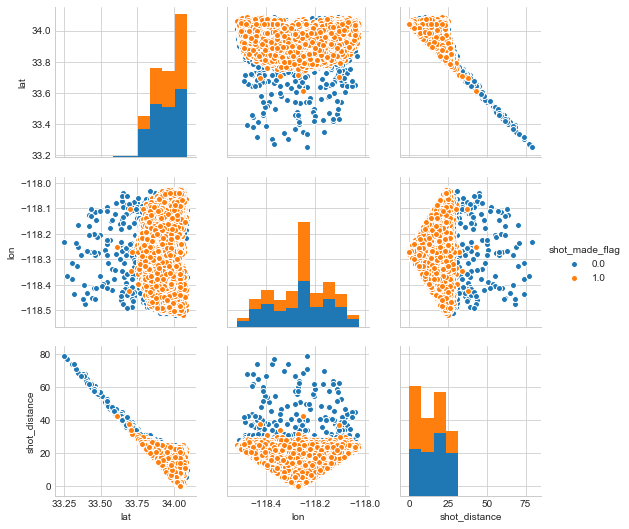

In [14]:
sns.set_style('whitegrid')
sns.pairplot(df, vars=['lat', 'lon', 'shot_distance'], hue='shot_made_flag')
plt.show()

In [144]:
# Create Dummy variables for list of categorical labels
cols_d = df2[['action_type','combined_shot_type','season','shot_type','shot_zone_area','shot_zone_basic',
          'shot_zone_range','team_name','game_date','matchup']]

dummies = pd.get_dummies(cols_d)
dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Columns: 1734 entries, action_type_Alley Oop Dunk Shot to matchup_LAL vs. WAS
dtypes: uint8(1734)
memory usage: 42.5 MB


In [145]:
dummies.head(5)

action_type_Alley Oop Dunk Shot  action_type_Alley Oop Layup shot  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   action_type_Cutting Layup Shot  action_type_Driving Bank shot  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   action_type_Driving Dunk Shot  action_type_Driving Finger Roll Layup Shot  \
0                              0                                           0   
1                              0                                           0   
2                              0                                           0   
3                              1                                           0   
4                              0                                           0   

   action_type_Driving Finger Roll Shot  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   action_type_Driving Floating Bank Jump Shot  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   action_type_Driving Floating Jump Shot  action_type_Driving Hook Shot  \
0                                       0                              0   
1                                       0                              0   
2                                       0                              0   
3                                       0                              0   
4                                       0                              0   

          ...           matchup_LAL vs. PHX  matchup_LAL vs. POR  \
0         ...                             0                    0   
1         ...                             0                    0   
2         ...                             0                    0   
3         ...                             0                    0   
4         ...                             0                    0   

   matchup_LAL vs. SAC  matchup_LAL vs. SAN  matchup_LAL vs. SAS  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   matchup_LAL vs. SEA  matchup_LAL vs. TOR  matchup_LAL vs. UTA  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   matchup_LAL vs. VAN  matchup_LAL vs. WAS  
0                    0                    0  
1                    0                    0  
2                    0                    0  
3                    0                    0  
4                    0                    0  

[5 rows x 1734 columns]

In [154]:
# drop orginal categorical columns and append dummy columns
df_d = df2.drop(['action_type','combined_shot_type','season','shot_type','shot_zone_area','shot_zone_basic','shot_zone_range',
            'team_name','game_date','matchup'],axis=1)
df_dummie = df_d.join(dummies)
df_dummie.head(5)


shot_id  game_event_id   game_id      lat  loc_x  loc_y       lon  \
0        2             12  20000012  34.0443   -157      0 -118.4268   
1        3             35  20000012  33.9093   -101    135 -118.3708   
2        4             43  20000012  33.8693    138    175 -118.1318   
3        5            155  20000012  34.0443      0      0 -118.2698   
4        6            244  20000012  34.0553   -145    -11 -118.4148   

   minutes_remaining  period  playoffs         ...           \
0                 10       1         0         ...            
1                  7       1         0         ...            
2                  6       1         0         ...            
3                  6       2         0         ...            
4                  9       3         0         ...            

   matchup_LAL vs. PHX  matchup_LAL vs. POR  matchup_LAL vs. SAC  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   matchup_LAL vs. SAN matchup_LAL vs. SAS  matchup_LAL vs. SEA  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

   matchup_LAL vs. TOR  matchup_LAL vs. UTA  matchup_LAL vs. VAN  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   matchup_LAL vs. WAS  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 1749 columns]

In [155]:
df_dummie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Columns: 1749 entries, shot_id to matchup_LAL vs. WAS
dtypes: float64(3), int64(11), object(1), uint8(1734)
memory usage: 45.4+ MB
